<a href="https://colab.research.google.com/github/Radhe-0/Practicas/blob/main/Machine%20Learning/Red_neuronal_2(Regresion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red neuronal de clasificación

### Importaré el módulo para generar datos de práctica

In [1]:
#-----------------------------------------#
!git clone https://github.com/Radhe-0/Generadores.git
#-----------------------------------------#

Cloning into 'Generadores'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 138 (delta 76), reused 38 (delta 18), pack-reused 0
Receiving objects: 100% (138/138), 458.95 KiB | 6.29 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [1]:
#-----------------------------------------#
%cd Generadores
#-----------------------------------------#

/content/Generadores


## Importo las librerías que voy a usar

In [2]:
#-----------------------------------------#
from Generadores import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
#-----------------------------------------#

## Cargo los datos a un Data Frame

In [50]:
#-----------------------------------------#
datos = DatosSVM(300)
df = pd.DataFrame(datos, columns=['X','Y'])
df.head()
#-----------------------------------------#

,X,Y
0,-1.808646,-1.897581
1,-0.411481,-1.711251
2,-2.000026,-2.070316
3,-0.943450,-4.031668
4,-2.275491,-2.075368


## Visualizo los datos

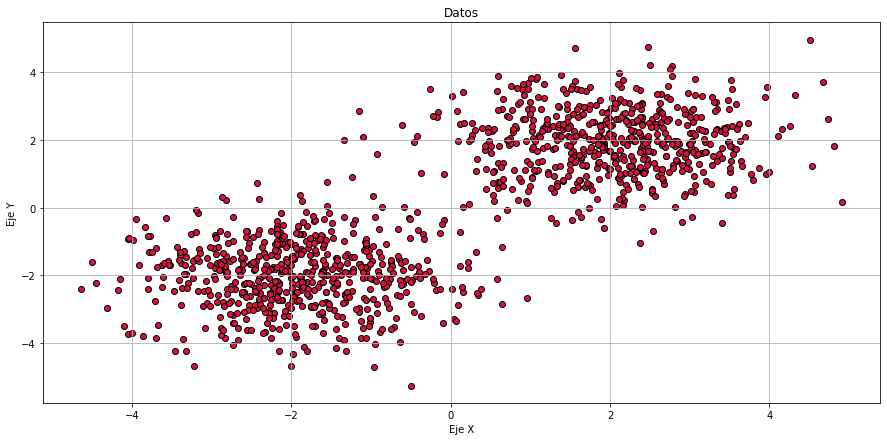

In [51]:
#-----------------------------------------#
fig, ax = plt.subplots(nrows=1, figsize=(15,7), ncols=1, sharey=True)
plt.scatter(df['X'],df['Y'],color='crimson', edgecolors='black')
plt.title('Datos')
plt.ylabel('Eje Y')
plt.xlabel('Eje X')
plt.grid()
plt.show()
#-----------------------------------------#

## Separo los datos en dos grupos: Los datos de entrenamiento y los datos de evaluación

In [52]:
#-----------------------------------------#
X = df['X'].to_numpy().reshape(-1,1)
Y = df['Y'].to_numpy()

xtrain, xtest, ytrain, ytest = train_test_split(X, Y)
#-----------------------------------------#

## Grafico los datos de entrenamiento junto con los de evaluación

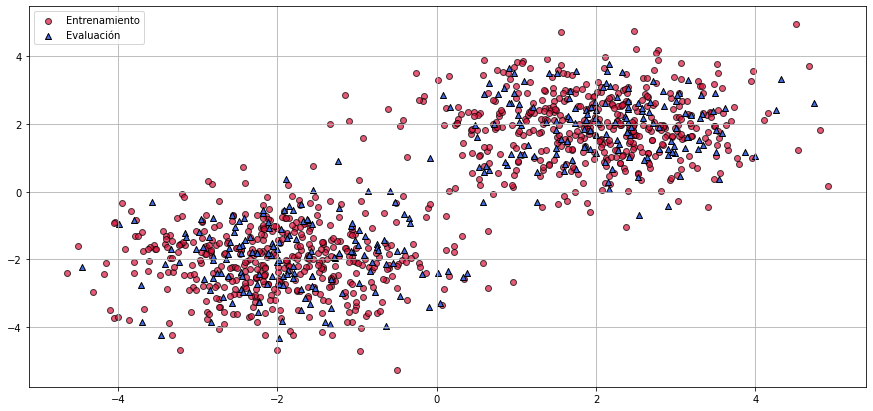

In [53]:
#-----------------------------------------#
fig, ax = plt.subplots(nrows=1, figsize=(15,7), ncols=1, sharey=True)
plt.scatter(xtrain,ytrain,color='crimson', edgecolors='black', label='Entrenamiento',alpha=0.7)
plt.scatter(xtest,ytest,color='royalblue', edgecolors='black', label='Evaluación',marker='^')
plt.legend()
plt.grid()
plt.show()
#-----------------------------------------#

## Creo la red neuronal

In [54]:
#-----------------------------------------#
modelo = MLPRegressor(hidden_layer_sizes = (10,10,10), max_iter = 1000, solver='adam')
#-----------------------------------------#

## Entreno la red

In [55]:
#-----------------------------------------#
modelo.fit(xtrain, ytrain)
#-----------------------------------------#

MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

## Realizo las predicciones para graficar los puntos de regresión

In [56]:
#-----------------------------------------#
predX = np.linspace(-5,5,300).reshape(-1,1)
predY = modelo.predict(np.linspace(-5,5,300).reshape(-1,1))
#-----------------------------------------#

## Realizo el nuevo gráfico

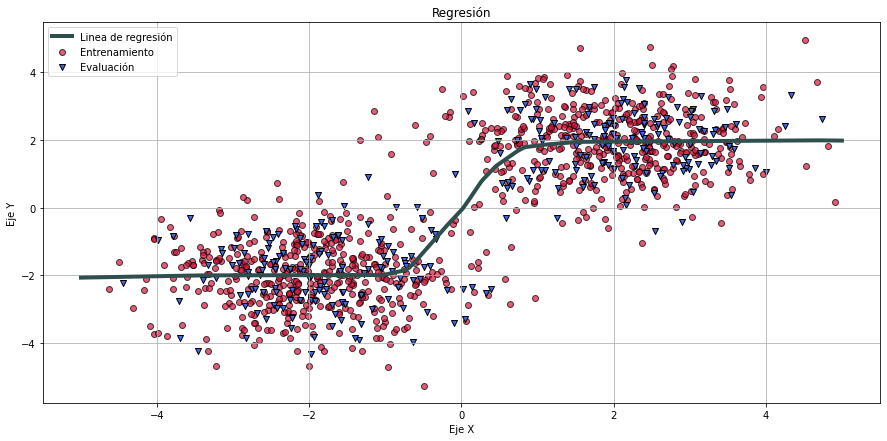

In [57]:
#-----------------------------------------#
fig, ax = plt.subplots(nrows=1, figsize=(15,7), ncols=1, sharey=True)
plt.scatter(xtrain,ytrain,color='crimson', edgecolors='black', label='Entrenamiento',alpha=0.7)
plt.scatter(xtest,ytest,color='royalblue', edgecolors='black', label='Evaluación', marker='v')
plt.plot(predX,predY, color='darkslategrey',lw=4, label='Linea de regresión')
plt.title('Regresión')
plt.ylabel('Eje Y')
plt.xlabel('Eje X')
plt.legend()
plt.grid()
plt.show()
#-----------------------------------------#

In [58]:
#-----------------------------------------#
modelo.score(xtest, ytest)
#-----------------------------------------#

0.7518806969670394

### La precisión de la red es del 75%

## Realizo algunas predicciones

In [65]:
x1 = 0
x2 = -5
x3 = 5
x4 = -2
x5 = 2

pred1 = modelo.predict([[x1]])
pred2 = modelo.predict([[x2]])
pred3 = modelo.predict([[x3]])
pred4 = modelo.predict([[x4]])
pred5 = modelo.predict([[x5]])

print(f'Cuando x vale {x1} :', pred1)
print(f'Cuando x vale {x2}:', pred2)
print(f'Cuando x vale {x3}:', pred3)
print(f'Cuando x vale {x4}:', pred4)
print(f'Cuando x vale {x5}:', pred5)

Cuando x vale 0 : [-0.07051615]
Cuando x vale -5: [-2.06593604]
Cuando x vale 5: [1.9762009]
Cuando x vale -2: [-1.99352209]
Cuando x vale 2: [1.94611847]


## Realizo un gráfico de las predicciones

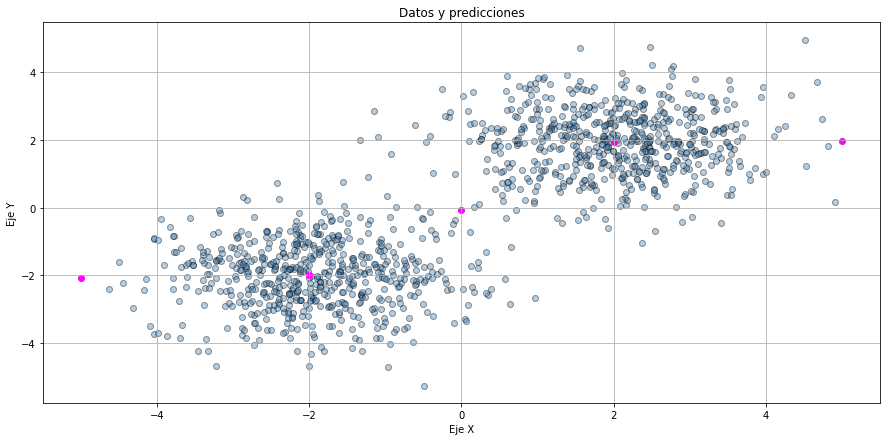

In [80]:
#-----------------------------------------#
fig, ax = plt.subplots(nrows=1, figsize=(15,7), ncols=1, sharey=True)
plt.scatter(X,Y, color='steelblue',edgecolors='black',alpha=0.4)
plt.scatter(x1, pred1, color='fuchsia',edgecolors='fuchsia')
plt.scatter(x2, pred2, color='fuchsia',edgecolors='fuchsia')
plt.scatter(x3, pred3, color='fuchsia',edgecolors='fuchsia')
plt.scatter(x4, pred4, color='fuchsia',edgecolors='fuchsia')
plt.scatter(x5, pred5, color='fuchsia',edgecolors='fuchsia')
plt.title('Datos y predicciones')
plt.ylabel('Eje Y')
plt.xlabel('Eje X')
plt.grid()
plt.show()
#-----------------------------------------#